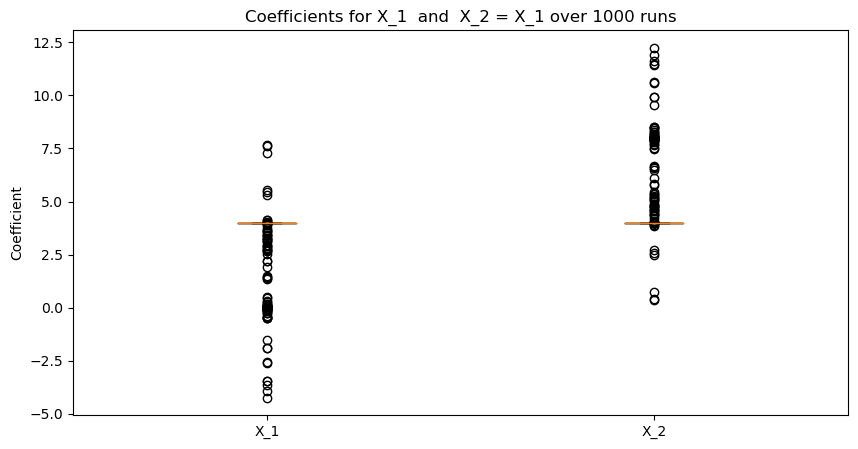

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


num_runs = 1000
coefficients = []

for _ in range(num_runs):
    # Create correlated synthetic data for X_1 and X_2
    mean = [1, 1]
    cov = [[1, 0.9], [0.9, 1]]
    X_1, X_2 = np.random.multivariate_normal(mean, cov, 1000).T

    # Generate target variable y using the given equation
    y = 3 * X_1 + 5 * X_1 + 15

    # Combine X_1 and X_2 into a single DataFrame
    data = pd.DataFrame({"X_1": X_1, "X_2": X_1})

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.01, random_state=42)

    # Fit a linear regression model on the training data
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Store the coefficients of the model
    coefficients.append(reg.coef_)

# Convert the list of coefficients to a NumPy array
coefficients = np.array(coefficients)

# Plot the coefficients
plt.figure(figsize=(10, 5))
plt.boxplot(coefficients, labels=["X_1", "X_2"])
plt.title("Coefficients for X_1  and  X_2 = X_1 over 1000 runs")
plt.ylabel("Coefficient")
plt.show()


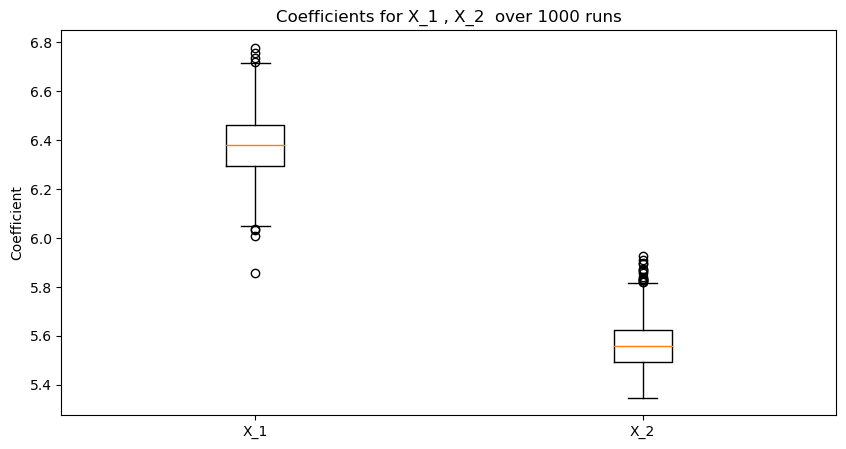

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor


num_runs = 1000
coefficients = []

for _ in range(num_runs):
    # Create correlated synthetic data for X_1 and X_2
    mean = [1, 3]
    cov = [[1, 0.9], [0.9, 1]]
    X_1, X_2 = np.random.multivariate_normal(mean, cov, 700).T

    # Generate target variable y using the given equation
    y = 3 * X_1 + 5 * X_2 + X_1*X_2 + 0.2*np.random.normal(1, 1, size=(700)) 

    # Combine X_1 and X_2 into a single DataFrame
    data = pd.DataFrame({"X_1": X_1, "X_2": X_2})

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.01)

    # Fit a linear regression model on the training data
    reg = SGDRegressor()
    reg.fit(X_train, y_train)

    # Store the coefficients of the model
    coefficients.append(reg.coef_)

# Convert the list of coefficients to a NumPy array
coefficients = np.array(coefficients)

# Plot the coefficients
plt.figure(figsize=(10, 5))
plt.boxplot(coefficients, labels=["X_1", "X_2"])
plt.title("Coefficients for X_1 , X_2  over 1000 runs")
plt.ylabel("Coefficient")
plt.show()

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


num_runs = 100
coefficients = []

for _ in range(num_runs):
    # Create correlated synthetic data for X_1, X_2, X_3, and X_4
    mean = [1, 1, 1, 1]
    cov = [
         [1, 0.95, 0.9, 0.85],
        [0.95, 1, 0.85, 0.9],
        [0.9, 0.85, 1, 0.95],
        [0.85, 0.9, 0.95, 1]
    ]
    X_1, X_2, X_3, X_4 = np.random.multivariate_normal(mean, cov, 700).T

    # Generate target variable y using the given equation
    y = 3 * X_1 + 4 * X_2 + 2 * X_3 + 5 * X_4 #+ 1/4*X_1*X_2**2

    # Combine X_1, X_2, X_3, and X_4 into a single DataFrame
    data = pd.DataFrame({"X_1": X_1, "X_2": X_2, "X_3": X_3, "X_4": X_4})

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

    # Fit a linear regression model on the training data
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)

    # Store the coefficients of the model
    coefficients.append(reg.coef_)

# Convert the list of coefficients to a NumPy array
coefficients = np.array(coefficients)

plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(coefficients[:, i], label=f"X_{i+1}")
plt.title("Coefficients for X_1, X_2, X_3, and X_4 over 100 runs")
plt.ylabel("Coefficient")
plt.xlabel("Run")
plt.legend()
plt.show()

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

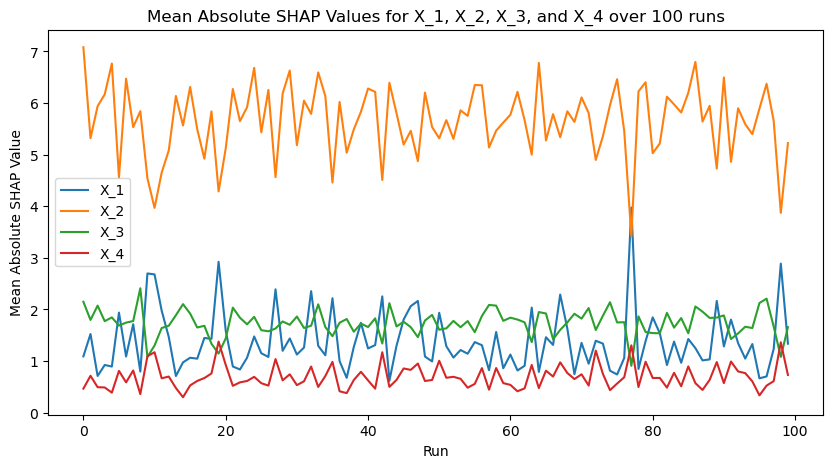

In [33]:
#!pip install shap

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import shap



num_runs = 100
shap_values_list = []

for _ in range(num_runs):
    # Create correlated synthetic data for X_1, X_2, X_3, and X_4
    mean = [1, 1, 1, 1]
    cov = [
        [1, 0.9, 0.8, 0.7],
        [0.9, 1, 0.7, 0.8],
        [0.8, 0.7, 1, 0.9],
        [0.7, 0.8, 0.9, 1]
    ]
    X_1, X_2, X_3, X_4 = np.random.multivariate_normal(mean, cov, 500).T

    # Generate target variable y using the given equation
    y = 3 * X_1 + 5 * X_2 + 2 * X_3 + 2 * X_4 

    # Combine X_1, X_2, X_3, and X_4 into a single DataFrame
    data = pd.DataFrame({"X_1": X_1, "X_2": X_2, "X_3": X_3, "X_4": X_4})

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

    # Fit a linear regression model on the training data
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)

    # Explain the model's predictions using SHAP values
    explainer = shap.Explainer(reg, X_train)
    shap_values = explainer(X_test)

    # Calculate the mean absolute SHAP values for each feature
    mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)
    shap_values_list.append(mean_abs_shap_values)

# Convert the list of SHAP values to a NumPy array
shap_values_array = np.array(shap_values_list)

# Plot the SHAP values as a line chart
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(shap_values_array[:, i], label=f"X_{i+1}")
plt.title("Mean Absolute SHAP Values for X_1, X_2, X_3, and X_4 over 100 runs")
plt.ylabel("Mean Absolute SHAP Value")
plt.xlabel("Run")
plt.legend()
plt.show()


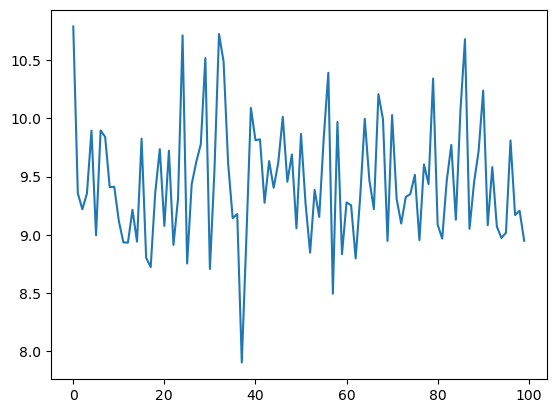

In [37]:
plt.plot(shap_values_array[:, 0]+shap_values_array[:, 1]+shap_values_array[:, 2]+shap_values_array[:, 3], label=f"X_{i+1}")
plt.show()

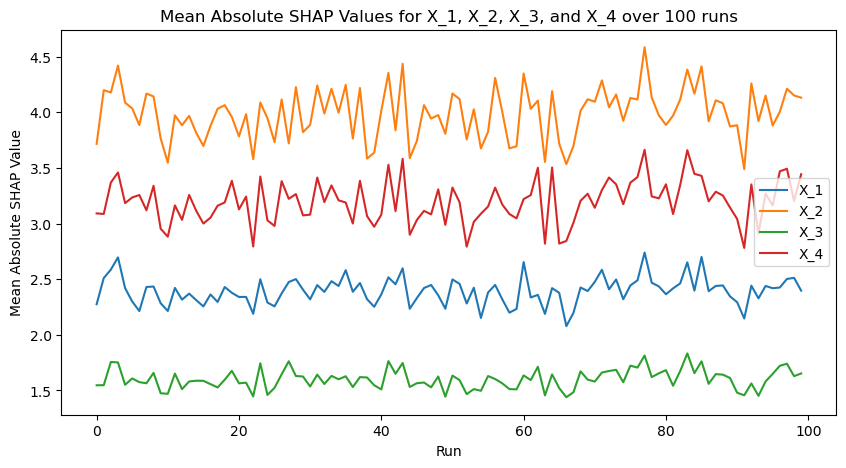

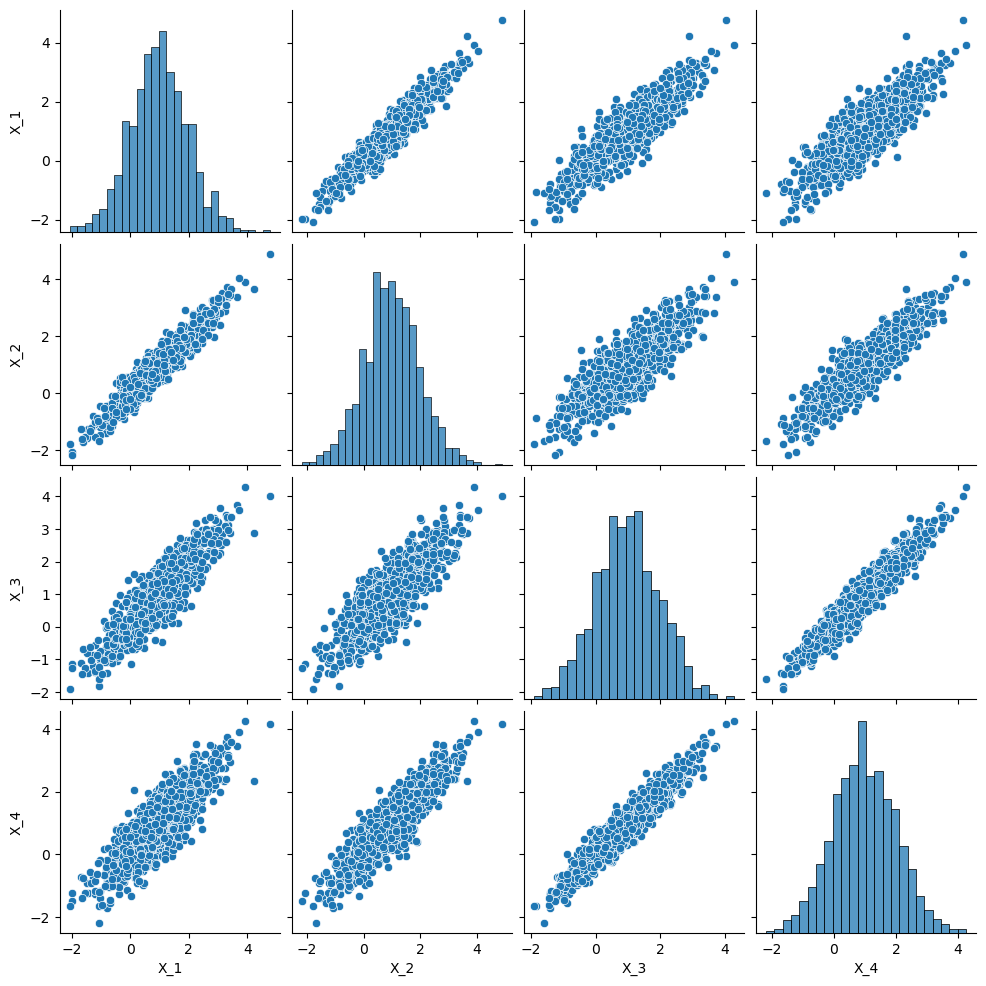

In [109]:
#!pip install seaborn

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Set random seed for reproducibility
np.random.seed(42)

num_runs = 100
shap_values_list = []

for _ in range(num_runs):
    # Create correlated synthetic data for X_1, X_2, X_3, and X_4
    mean = [1, 1, 1, 1]
    cov = [
        [1, 0.95, 0.9, 0.85],
        [0.95, 1, 0.85, 0.9],
        [0.9, 0.85, 1, 0.95],
        [0.85, 0.9, 0.95, 1]
    ]
    X_1, X_2, X_3, X_4 = np.random.multivariate_normal(mean, cov, 1000).T

    # Generate target variable y using the given equation
    y = 3 * X_1 + 5 * X_2 + 2 * X_3 + 4 * X_4 

    # Combine X_1, X_2, X_3, and X_4 into a single DataFrame
    data = pd.DataFrame({"X_1": X_1, "X_2": X_2, "X_3": X_3, "X_4": X_4})

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

    # Fit a linear regression model on the training data
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Explain the model's predictions using SHAP values
    explainer = shap.Explainer(reg, X_train)
    shap_values = explainer(X_test)

    # Calculate the mean absolute SHAP values for each feature
    mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)
    shap_values_list.append(mean_abs_shap_values)

# Convert the list of SHAP values to a NumPy array
shap_values_array = np.array(shap_values_list)

# Plot the SHAP values as a line chart
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(shap_values_array[:, i], label=f"X_{i+1}")
plt.title("Mean Absolute SHAP Values for X_1, X_2, X_3, and X_4 over 100 runs")
plt.ylabel("Mean Absolute SHAP Value")
plt.xlabel("Run")
plt.legend()
plt.show()

# Create scatter plots for all different combinations of variables
sns.pairplot(data)
plt.show()


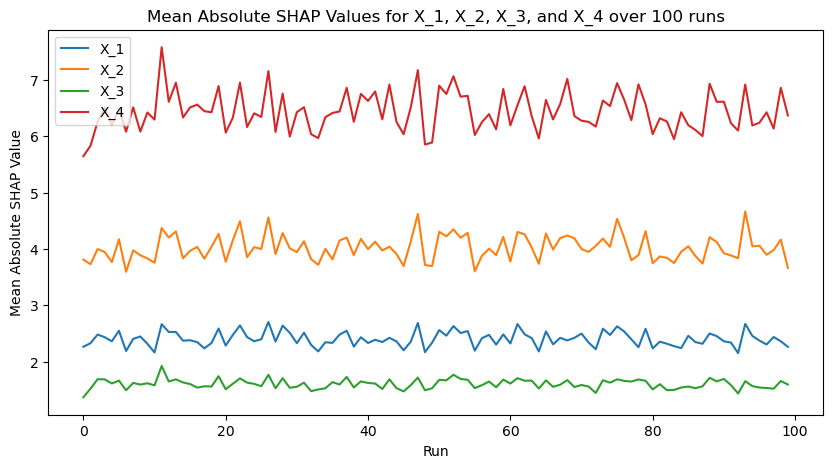

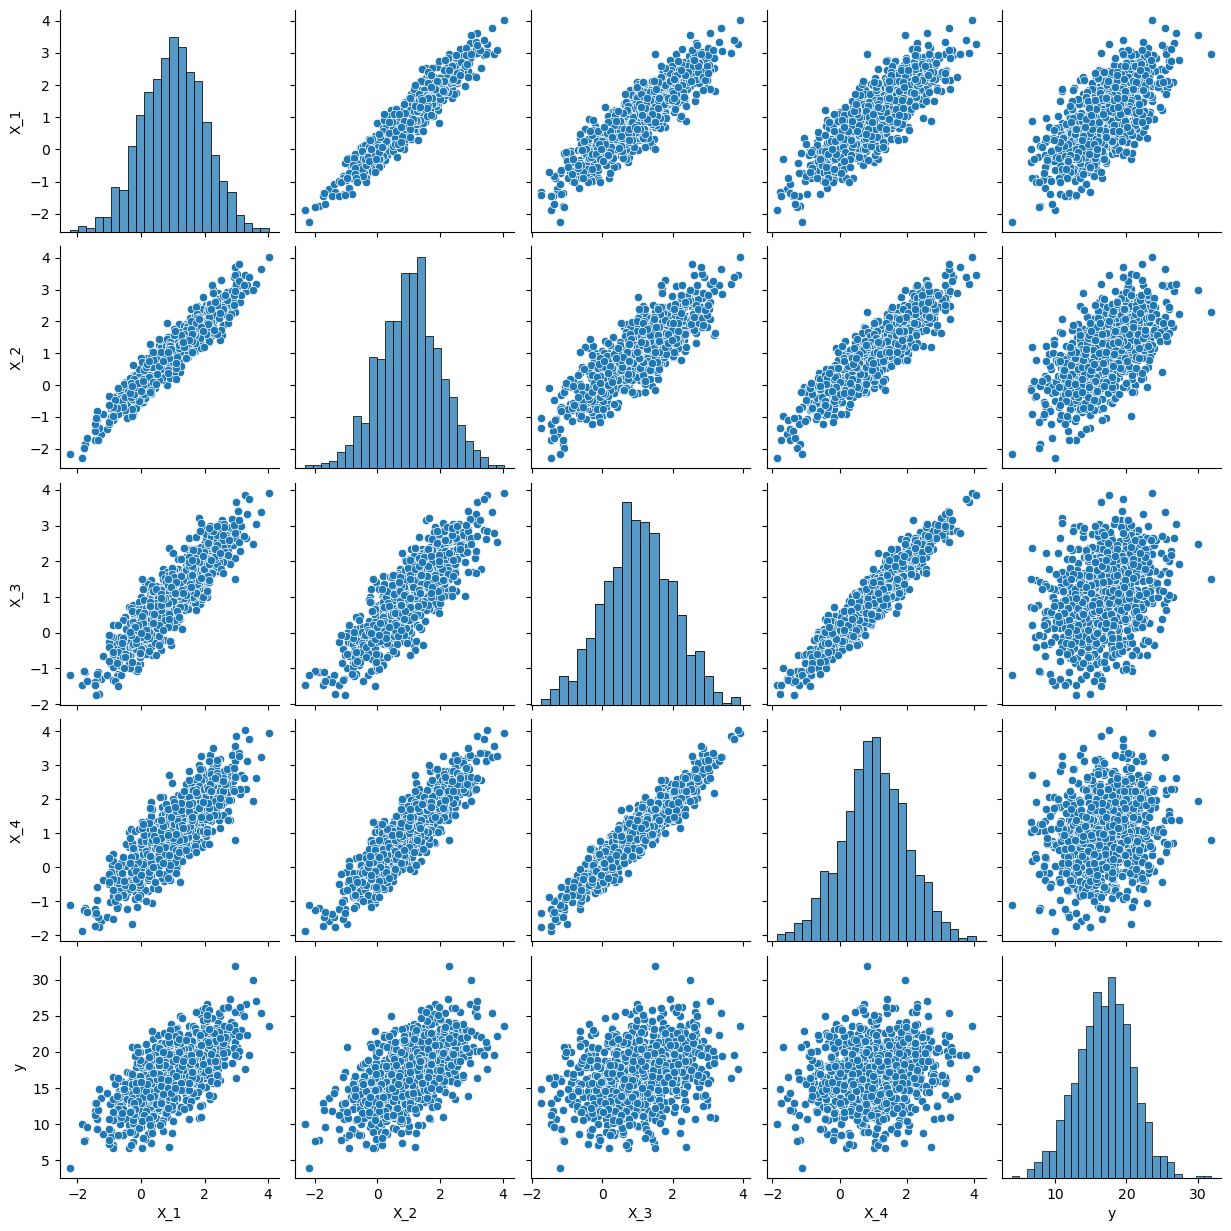

In [119]:
#!pip install seaborn

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import shap



num_runs = 100
shap_values_list = []

for _ in range(num_runs):
    # Create correlated synthetic data for X_1, X_2, X_3, and X_4 with stronger correlations
    mean = [1, 1, 1, 1]
    cov = [
        [1, 0.95, 0.9, 0.85],
        [0.95, 1, 0.85, 0.9],
        [0.9, 0.85, 1, 0.95],
        [0.85, 0.9, 0.95, 1]
    ]
    X_1, X_2, X_3, X_4 = np.random.multivariate_normal(mean, cov, 1000).T

    # Generate target variable y using the given equation
    y = 3 * X_1 + 5 * X_2 + 2 * X_3 + -8 * X_4 + 15

    # Combine X_1, X_2, X_3, X_4, and y into a single DataFrame
    data = pd.DataFrame({"X_1": X_1, "X_2": X_2, "X_3": X_3, "X_4": X_4, "y": y})

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data.drop("y", axis=1), data["y"], test_size=0.2, random_state=42)

    # Fit a linear regression model on the training data
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Explain the model's predictions using SHAP values
    explainer = shap.Explainer(reg, X_train)
    shap_values = explainer(X_test)

    # Calculate the mean absolute SHAP values for each feature
    mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)
    shap_values_list.append(mean_abs_shap_values)

# Convert the list of SHAP values to a NumPy array
shap_values_array = np.array(shap_values_list)

# Plot the SHAP values as a line chart
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(shap_values_array[:, i], label=f"X_{i+1}")
plt.title("Mean Absolute SHAP Values for X_1, X_2, X_3, and X_4 over 100 runs")
plt.ylabel("Mean Absolute SHAP Value")
plt.xlabel("Run")
plt.legend()
plt.show()

# Create scatter plots for all different combinations of variables, including y
sns.pairplot(data)
plt.show()
